In [1]:
#노트북 안에서 그림을 그리기 위해 
%matplotlib inline

In [2]:
#import the standard python scientific libraries
import pandas as pd
import numpy as np
from scipy import stats
#표준 연속/이산 확률 분포(집적도 함수, 샘플러, 연속 분포 함수)와 
#다양한 통계 테스트, 그리고 좀 더 기술적인 통계 도구
import matplotlib.pyplot as plt
import seaborn as sns
#Seaborn은 Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시
#각화 패키지이다

#Suppress Deprecation and Incorrect Usage warning
#warnings 모듈은 경고 메시지를 출력하고 걸러내는 기능을 제공

import warnings
warnings.filterwarnings('ignore')

scipy는 파이썬을 기반으로 하여 
과학, 분석, 그리고 엔지니어링을 위한 과학적 컴퓨팅 영역의 여러 기본적인 작업을 위한 
라이브러리(패키지 모음).
Scipy는 기본적으로 Numpy, Matplotlib, pandas, Sympy등 과 함께 동작.
SciPy는 수치적분 루틴과 미분방정식 해석기, 방정식의 근을 구하는 알고리즘, 표준 연속/이산 
확률분포와 다양한 통계관련  도구 등을 제공합니다. NumPy와 Scipy를 함께 사용하면 확장 애드온을
포함한 MATLAB을 완벽하게 대체합니다

In [3]:
import csv
question = pd.read_csv(
    r'C:\Users\dltmf\2019summer_study\Programmers_study\1. survey(0723)\schema.csv')

In [4]:
question.shape

(290, 3)

In [5]:
question.tail()

,Column,Question,Asked
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunit...,Learners


In [6]:
#판다스로 선다형 문제에 대한 응답을 가져옴 
mcq = pd.read_csv(
    r'C:\Users\dltmf\2019summer_study\Programmers_study\1. survey(0723)\multipleChoiceResponses.csv',
    encoding='ISO-8859-1',low_memory=False)
mcq.shape


(16716, 228)

In [7]:
mcq.columns
#228개의 컬럼, 즉 질문이 228개 였다는 것임

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [8]:
mcq.head(10) #head 에서도 부터 10개의 데이터를 뽑아라 

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,Brazil,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Male,United States,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Female,India,22.0,Employed full-time,NaN,NaN,No,Yes,Software Developer/Software Engineer,Fine,...,Very Important,Somewhat important,Very Important,Somewhat important,Somewhat important,Not important,Very Important,Very Important,Somewhat important,Somewhat important
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


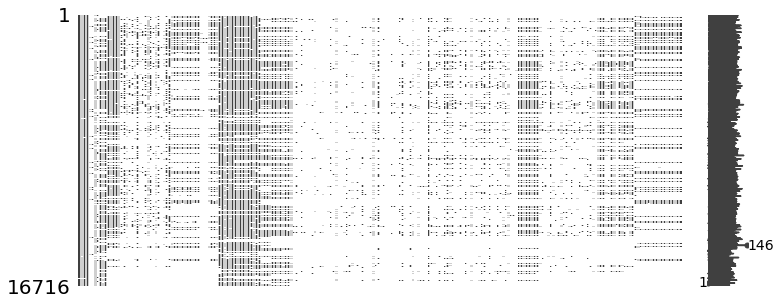

In [9]:
#missingno는 NaN데이터들에 대해 시각화를 해준다 
#NaN 데이터의 컬럼이 많아 아래 그래프 만으로는 내용을 파악하기 어렵다 
import missingno as msno
msno.matrix(mcq, figsize=(12,5))

#16716명의 데이터와 228개의 선다형 객관식 문제에 대한 응답 이당 mcq는 

# 설문통계

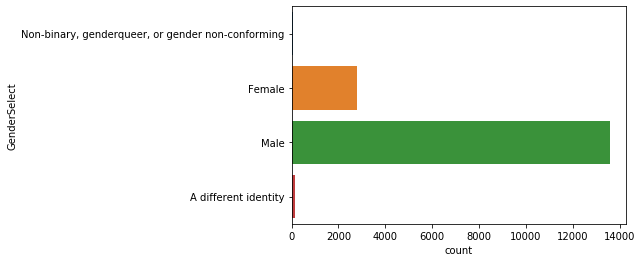

In [10]:
sns.countplot(y='GenderSelect', data=mcq)

#시본의 countplot 명령을 사용하면, 각 카테고리 값별로 데이터가 얼마나 있는지 표시할 수 있다. 
#countplot(x='column_name', data=dataframe), data 인수에는 대상이 되는 데이터프레임을, 
#x 인수에는 데이터 프레임의 열 이름 문자열을 넣는다 

In [11]:
#응답자중 여성보다는 남성의 비율이 더 높은편이다

In [12]:
#국가별 응답 수 
con_df = pd.DataFrame(mcq['Country'].value_counts())
#value_count() : 범주화 된 형태 확인, country 칼럼을 기준으로 수를 세는 것
#print(con_df)

con_df['국가'] = con_df.index
#con_df에 국가라는 칼럼명을 만들고 index로 지정, 국가코드를 만드는 것
#print(con_df)

con_df.columns=['응답수', '국가']
#print(con_df) #칼럼명을 지정해줌 

con_df = con_df.reset_index()
#con_df는 con_df의 응답수를 중심으로 순위순으로 배열시켜줌
#print(con_df)

con_df = con_df.drop('index', axis=1)
#axis=1 에서 index 라는 칼럼을 찾아 날린다 
#print(con_df)

#20위 까지만 알아보자
con_df.head(20)





,응답수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [13]:
#연령에 대한 정보를 본다 
mcq['Age'].describe()

#describe는 mcq 파일의 'Age'의 컬럼을 기준으로 정보를 요약해준다 !! 
#count는 합, mean std min .... 등등 

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

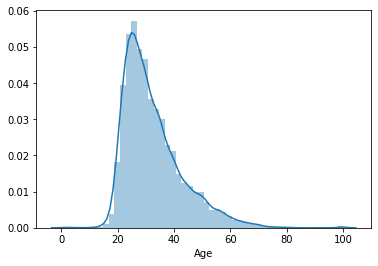

In [14]:
#distplot은 히스토그램과 kdeplot을 같이 그려주는 것
sns.distplot(mcq[mcq['Age']>0]['Age'])
#mcq[age]의 값이 0보다 큰 mcq의 에이지를 그래프로


In [15]:
#응답자의 대부분이 어리며
#20대부터 급격히 늘어나며 30대가 가장 많다 
#평균은 mean

countplot - 가장 많이 사용되는 countplot, 흔히 우리가 알던 막대 그래프로 가장 많이 사용되는 시각화 툴 !! 알고자 하는 컬럼을 x축 값에 넣으면 효과적인 시각화를 완성할 수 있다 

sns.countplot(data=train, x='embarked', hue='survived')
휴에 어떤 컬럼을 적으면 그 컬럼을 기준으로 데이터를 쪼갠다 

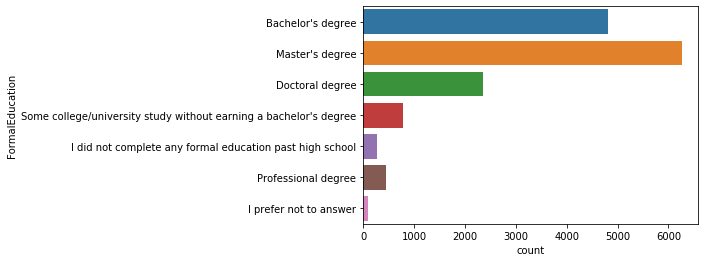

In [16]:
sns.countplot(data = mcq, y = 'FormalEducation')

In [17]:
#mcq['FormalEducation']
#학사 학위를 가진 사람보다 석사 학위를 가지고 있는 사람이 많다 

In [18]:
#value_counts 를 사용하면 그룹화된 데이터의 카운트 값을 보여준다 
#normalize = True 옵션을 사용하면
#해당 데이터가 전체 데이터에서 어느 정도의 비율을 차지하는지 알 수 있다 
mcq_major_count = pd.DataFrame(mcq['MajorSelect'].value_counts())
print(mcq_major_count)

                                                    MajorSelect
Computer Science                                           4397
Mathematics or statistics                                  2220
Engineering (non-computer focused)                         1339
Electrical Engineering                                     1303
Other                                                       848
Physics                                                     830
Information technology, networking, or system a...          693
A social science                                            531
Biology                                                     274
Management information systems                              237
A humanities discipline                                     198
A health science                                            152
Psychology                                                  137
I never declared a major                                     65
Fine arts or performing arts            

In [19]:
mcq_major_percent = pd.DataFrame(mcq['MajorSelect'].value_counts(normalize=True))
print(mcq_major_percent)

                                                    MajorSelect
Computer Science                                       0.331074
Mathematics or statistics                              0.167156
Engineering (non-computer focused)                     0.100821
Electrical Engineering                                 0.098110
Other                                                  0.063851
Physics                                                0.062495
Information technology, networking, or system a...     0.052180
A social science                                       0.039982
Biology                                                0.020631
Management information systems                         0.017845
A humanities discipline                                0.014909
A health science                                       0.011445
Psychology                                             0.010315
I never declared a major                               0.004894
Fine arts or performing arts            

In [20]:
#데이터 프레임 제작 
mcq_major_df = mcq_major_count.merge(
    mcq_major_percent, left_index=True, right_index = True)
mcq_major_df

,MajorSelect_x,MajorSelect_y
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


In [21]:
#칼럼 수를 준 것이다 !! 
mcq_major_df.columns = ['응답수', '비율']
mcq_major_df

,응답수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


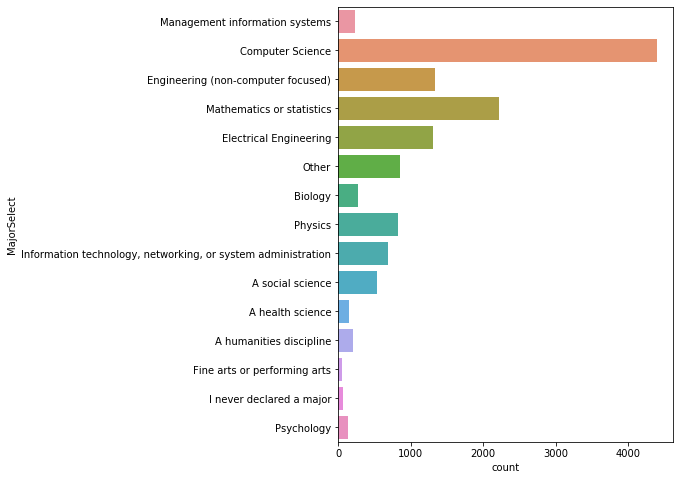

In [22]:
plt.figure(figsize = (6,8))
sns.countplot(data = mcq, y = 'MajorSelect')

# 취업여부 

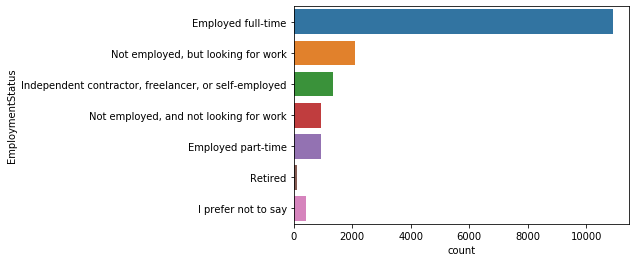

In [23]:
sns.countplot(data = mcq, y = 'EmploymentStatus')

In [24]:
#values_counts() 를 통해서 수를 세는 것이다 !!!!!!!!!!! 취업상태 칼럼을 기준으로 !!!! 
#즉 취업상태가 여러가지가 있는데 각각의 항목에 대한 수를 세는 것 !!!!!!!! 
Employment_count = pd.DataFrame(mcq['EmploymentStatus'].value_counts())
Employment_count

,EmploymentStatus
Employed full-time,10897
"Not employed, but looking for work",2110
"Independent contractor, freelancer, or self-employed",1330
"Not employed, and not looking for work",924
Employed part-time,917
I prefer not to say,420
Retired,118


In [25]:
#퍼센트를 알아보기 위해서는 !!!!!!!???????????
Employment_percent = pd.DataFrame(mcq['EmploymentStatus'].value_counts(normalize = 'True'))
Employment_percent

,EmploymentStatus
Employed full-time,0.651890
"Not employed, but looking for work",0.126226
"Independent contractor, freelancer, or self-employed",0.079564
"Not employed, and not looking for work",0.055276
Employed part-time,0.054858
I prefer not to say,0.025126
Retired,0.007059


In [26]:
#위에 두게를 합치기 위해 !!!!!!!!!!!!!! merge를 쓰는 것이다 !!!!!!!!!!!! 
Employment_df = Employment_count.merge(Employment_percent, left_index=True, right_index=True)
Employment_df

,EmploymentStatus_x,EmploymentStatus_y
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


In [27]:
Employment_df.columns = ['응답수', '비율']
Employment_df

,응답수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


# 프로그래밍 경험

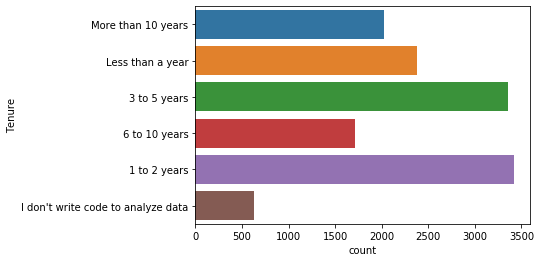

In [28]:
# Tenure 항목은 데이터 사이언스 분야에서 코딩 경험이 얼마나 되는지에 대한 질문이다
# 대부분 5년 미만이며, 특히 1~2년의 경험을 가진 사람들이 많다 
sns.countplot(data=mcq, y='Tenure')

판다스 dataframe의 인덱싱(loc, iloc)
- dataframe의 인덱싱 : 특정 데이터만 골라낼 수 있다
- df.loc[행 인덱싱 값]
- df.loc[행 인덱싱 값, 열 인덱싱 값]

In [29]:
korea = mcq.loc[(mcq['Country'] == 'South Korea')]
korea

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
356,Male,South Korea,27.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,Female,South Korea,36.0,Employed full-time,NaN,NaN,No,Yes,Researcher,Fine,...,Very Important,Very Important,Very Important,Somewhat important,Somewhat important,Very Important,Somewhat important,Not important,Not important,Not important
491,Male,South Korea,34.0,Employed part-time,NaN,NaN,Yes,NaN,Scientist/Researcher,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
565,Male,South Korea,53.0,Employed full-time,NaN,NaN,Yes,NaN,Researcher,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601,Male,South Korea,35.0,Employed full-time,NaN,NaN,No,Yes,Programmer,Fine,...,Very Important,Not important,Not important,Not important,Somewhat important,Somewhat important,Very Important,Not important,Somewhat important,Not important
645,Male,South Korea,26.0,Employed full-time,NaN,NaN,No,Yes,Software Developer/Software Engineer,Fine,...,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Very Important,Not important,Somewhat important,Somewhat important,Very Important
715,Female,South Korea,30.0,Employed full-time,NaN,NaN,Yes,NaN,Data Miner,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
786,Female,South Korea,21.0,"Not employed, and not looking for work",Yes,"Yes, I'm focused on learning mostly data scien...",NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Somewhat important,Somewhat important,Not important,Somewhat important,Somewhat important,Somewhat important,Somewhat important
857,Male,South Korea,26.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1107,Male,South Korea,27.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
print('The number of interviewees in Korea: ' + str(korea.shape[0])
#Korea의 쉐잎은 (194, 228) 이다 즉 korea.shqpe[0]은 194 인 것이다 

SyntaxError: unexpected EOF while parsing (<ipython-input-30-3d8b2d6944c4>, line 2)

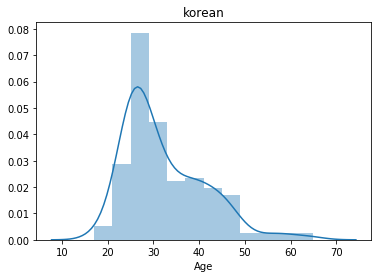

In [31]:
#나이를 기준으로 그래프를 그려보겠다 
#displot은 막대와 선 2개의 그래프를 그려주는 것이다 !! 
sns.distplot(korea['Age'].dropna(axis=0))
plt.title('korean')
plt.show()

#dropna - 결측값이 들어있는 행, 열을 제거하는 것 ! 
#결측값이 별로 없는 경우에는, 결측값이 들어있는 행 전체를 삭제하고 분석을 진행해도 무리가 없다 
#df.dropna(axis=0) 행을 날리는것 
#df.dropna(axis=1) 열을 날리는 것 

In [32]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5, 1.0, 'Korean')

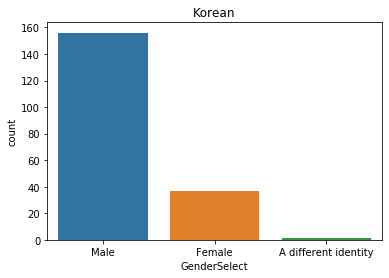

In [33]:
sns.countplot(x='GenderSelect', data=korea)
plt.title('Korean')

fig, ax = plt.subplots() 이런 형태의 모습을 자주 볼 수 있다
subplots()에서 2개의 값을 받을 수 있는데 figure와 axes값을 받을 수 있다 
fig란 figure로써 전체 subplot을 말한다 
서브플롯 안에 몇 개의 그래프가 있던지 상관없이 그걸 담는 하나, 전체 사이즈이다 
ax는 axe로써, 전체 중 낱낱개를 말한다. 서브플롯 안에 2개(a1, a2)의 그래프가 있다면 a1, a2를 일컫음 

# subplots의 예
fig, axes = plt.subplots(nrows=2, ncols=1)
plt.show()
세로로 2개의 그래프가 나온다

#subplot(X,Y,N) : 창 하나에 X * Y개의 그래프를 그릴것이며, 그중 N번째 그래프를 의미.

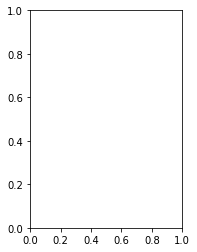

In [34]:
plt.subplot(1,2,1)

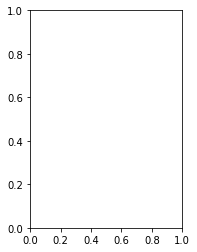

In [35]:
plt.subplot(1,2,2)

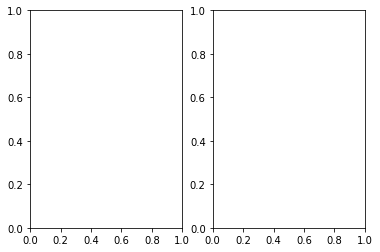

In [36]:
plt.subplot(1,2,1)
plt.subplot(1,2,2)

Text(0.5, 1.0, 'korean Male')

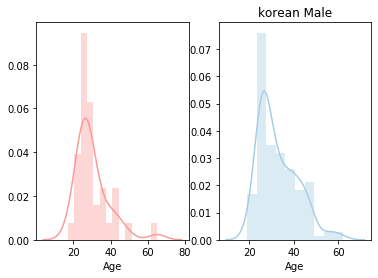

In [37]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(), 
            color=sns.color_palette("Paired")[4],
            norm_hist = False,
            ax = ax1)
plt.title('korea female')

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(),
 norm_hist=False, color=sns.color_palette("Paired")[0], ax=ax2)
plt.title('korean Male')

In [38]:
#figure.set_size_inches(12,5)

norm_hist:
만약에 트루면, 히스토그램 높이는 카운트가 아닌, density 를 나타낸다. 
ax :
만약에 주어지면, 해당 axis 에서 plot 한다

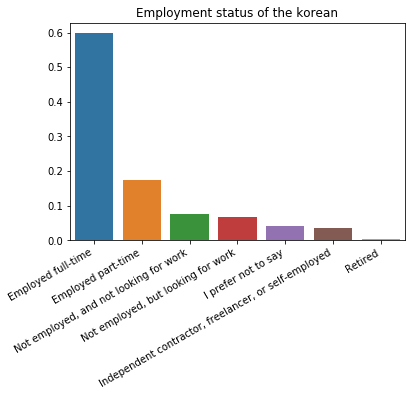

In [45]:
#여기서 부터는 강의를 들어야겠다 !!! 
# https://programmers.co.kr/learn/courses/21/lessons/937

sns.barplot(x = korea['EmploymentStatus'].unique(), #x는 코리아의 고용상태중 unique 뽑아님
            y = korea['EmploymentStatus'].value_counts()/len(korea)
           )
plt.xticks(rotation = 30, ha = 'right') # 글자크기 기울이는 것 
plt.title('Employment status of the korean')
plt.ylabel('')
plt.show()

In [40]:
#넘파이 유니크 활용 
import numpy as np

a = np.array([3, 1, 2, 2, 3])
print (np.unique(a))

[1 2 3]


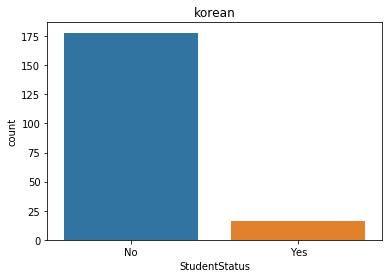

In [46]:
#결측값 처리 
#fillna() 함수, NaN을 특정 값으로 바꾼다 
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus', data=korea)
plt.title('korean')
plt.show()

In [51]:
#data 뽑아 내기 
full_time = mcq.loc[(mcq['EmploymentStatus'] == 'Employed full-time')]
print(full_time.shape)

looking_for_job = mcq.loc[(mcq['EmploymentStatus'] == 'Not employed, but looking for work')]
print(looking_for_job.shape)

(10897, 228)
(2110, 228)
